In [7]:
!pip install easyocr --no-deps # Colab already has all dependencies

     |████████████████████████████████| 62.4MB 64kB/s 


In [13]:
!pip install python-bidi

In [8]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 1.693s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#master


In [4]:
# list them
!ls -l

total 3508
-rw-r--r-- 1 root root   59898 Jan  5 13:45 chinese.jpg
-rw-r--r-- 1 root root   97910 Jan  5 13:45 easyocr_framework.jpeg
-rw-r--r-- 1 root root 1740957 Jan  5 13:45 english.png
-rw-r--r-- 1 root root  487995 Jan  5 13:45 example2.png
-rw-r--r-- 1 root root  127454 Jan  5 13:45 example3.png
-rw-r--r-- 1 root root  488641 Jan  5 13:45 example.png
-rw-r--r-- 1 root root  168376 Jan  5 13:45 french.jpg
-rw-r--r-- 1 root root   42159 Jan  5 13:45 japanese.jpg
-rw-r--r-- 1 root root  225531 Jan  5 13:45 korean.png
drwxr-xr-x 1 root root    4096 Jan  6 18:10 sample_data
-rw-r--r-- 1 root root   82229 Jan  5 13:45 thai.jpg
-rw-r--r-- 1 root root   34706 Jan  5 13:45 width_ths.png


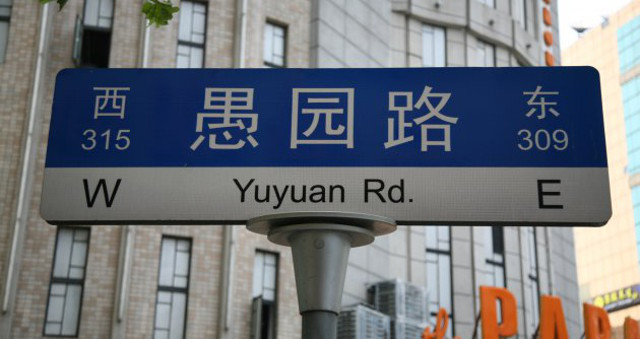

In [16]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("chinese.jpg")
im

In [14]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['th','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [18]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('chinese.jpg')
bounds

[([[189, 75], [469, 75], [469, 165], [189, 165]],
  '= |=] i',
  0.010036773048341274),
 ([[86, 80], [134, 80], [134, 128], [86, 128]], 'pi', 0.16931560635566711),
 ([[517, 81], [565, 81], [565, 123], [517, 123]], 'g', 0.08687887340784073),
 ([[78, 126], [136, 126], [136, 156], [78, 156]], '315', 0.8501907587051392),
 ([[514, 126], [574, 126], [574, 156], [514, 156]], '309', 0.7609310150146484),
 ([[226, 170], [414, 170], [414, 220], [226, 220]],
  ' yuyuan rd.',
  0.30725640058517456),
 ([[79, 173], [125, 173], [125, 213], [79, 213]], 'w.', 0.4416138231754303),
 ([[529, 173], [569, 173], [569, 213], [529, 213]], 'e', 0.31122127175331116)]

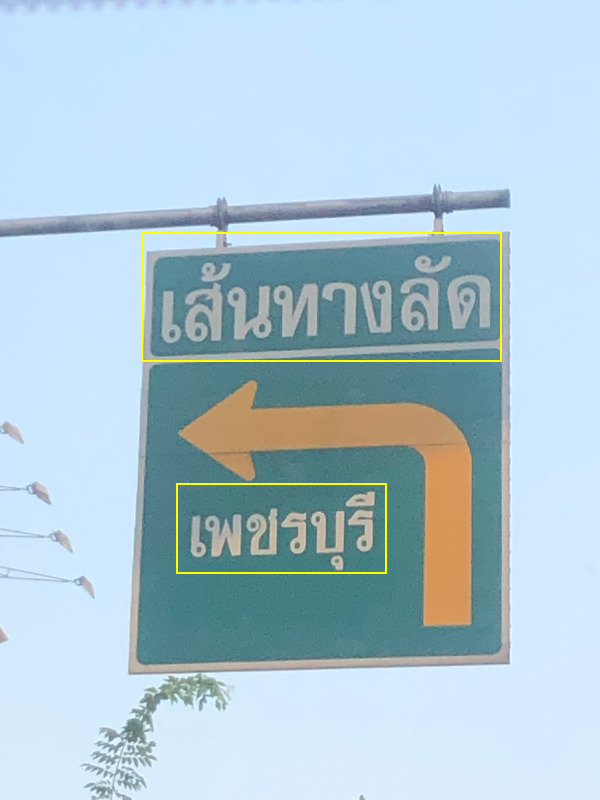

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)